## ติดตั้งโปรแกรมที่เกี่ยวข้อง

*   selenium
*   chromium-chromedriver



In [1]:
!pip install selenium
!apt-get update 
!apt install chromium-chromedriver

     |████████████████████████████████| 963 kB 5.3 MB/s 
     |████████████████████████████████| 359 kB 53.5 MB/s 
     |████████████████████████████████| 138 kB 47.1 MB/s 
     |████████████████████████████████| 3.6 MB 36.4 MB/s 
     |████████████████████████████████| 55 kB 1.4 MB/s 
     |████████████████████████████████| 58 kB 4.0 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.8 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/

## load lib


*   selenium
*   IPython.display
*   pandas
* datetime
* time
* json

In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from IPython.display import Image
import pandas as pd
from datetime import datetime,timedelta
import time
import json

## สร้าง ChromeOptions



In [86]:
chrome_options = webdriver.ChromeOptions()
driver = webdriver.Chrome(chrome_options=chrome_options)

C:\Users\win10x64\AppData\Local\Temp\ipykernel_5968\128282493.py:2: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(chrome_options=chrome_options)


In [87]:
driver.get("http://www.google.com")

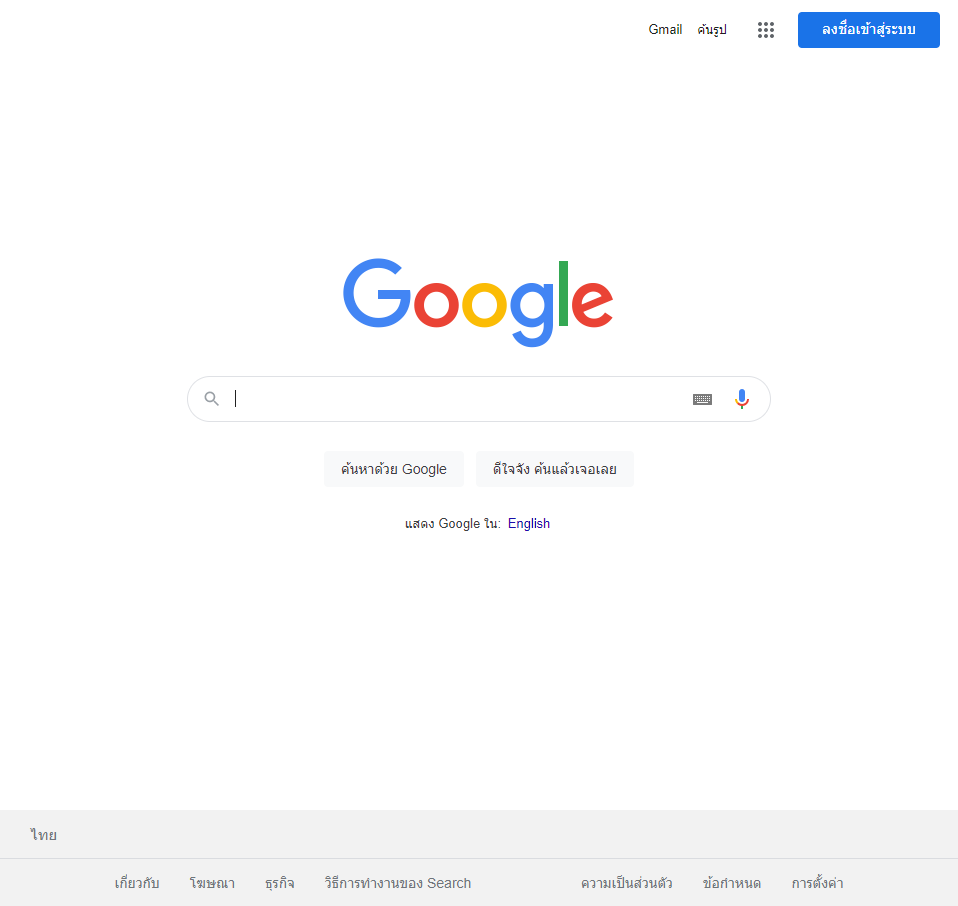

In [88]:
driver.save_screenshot("screenshot.png")
Image('screenshot.png')

## โหลดหน้า

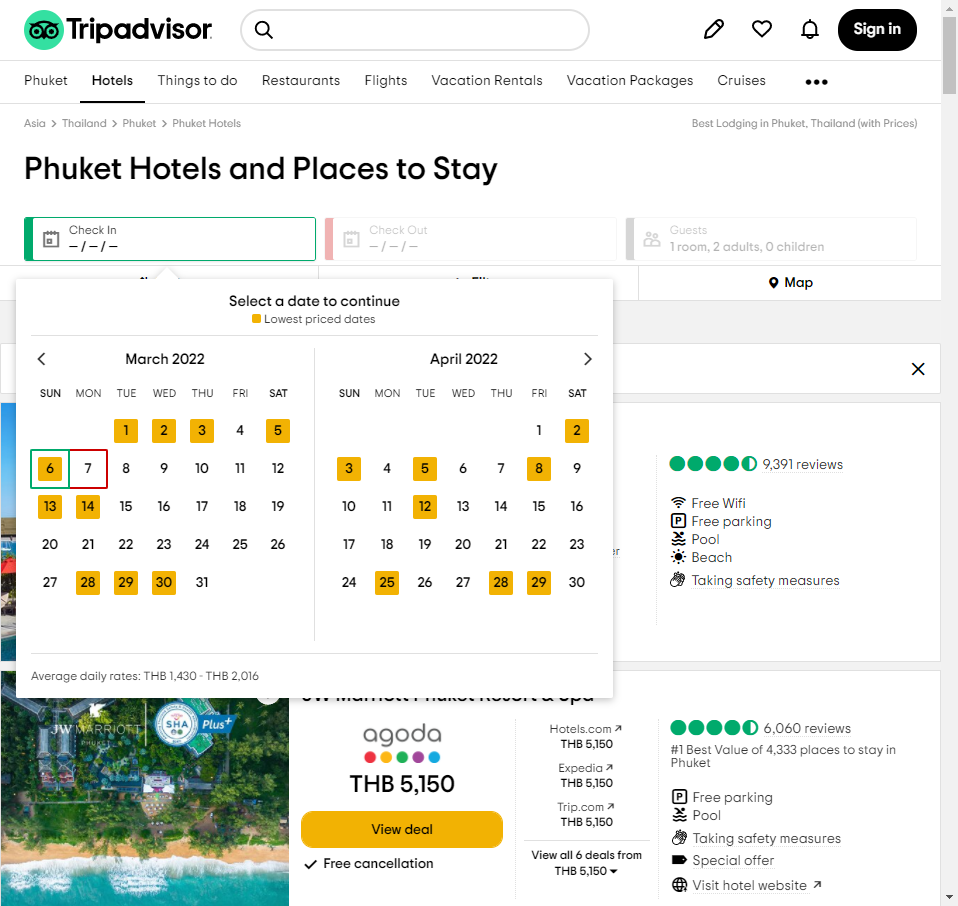

In [89]:
url = 'https://www.tripadvisor.com/Hotels-g293920-Phuket-Hotels.html'
driver.get(url)
time.sleep(10)
driver.save_screenshot("screenshot.png")
Image('screenshot.png')

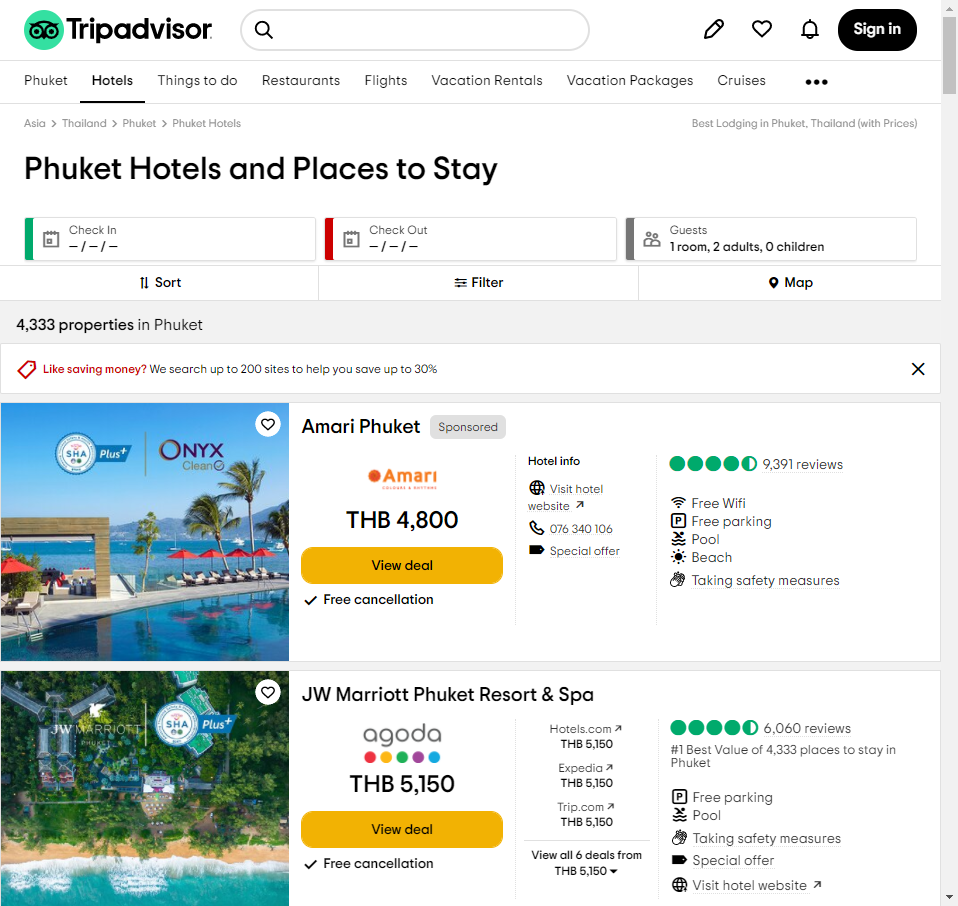

In [90]:
driver.switch_to.active_element.send_keys(Keys.ESCAPE)
driver.save_screenshot("screenshot.png")
Image('screenshot.png')

# ฟังก์ชั่นทั่วไป

## find_elements_by_id

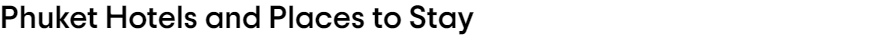

In [91]:
elements_by_id =  driver.find_element(By.ID,"HEADING")
elements_by_id.screenshot("screenshot.png")
Image('screenshot.png')

In [92]:
#.text
elements_by_id.text

'Phuket Hotels and Places to Stay'

In [93]:
#.get_attribute
elements_by_id.get_attribute('class')

'page_h1 ui_header h1 responsive corgi'

In [94]:
#.get_attribute
elements_by_id.get_attribute('data-test-target')

## find_elements_by_class

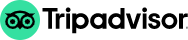

In [95]:
elements_by_class = driver.find_element(By.CLASS_NAME,'bDssy')
elements_by_class.screenshot("screenshot.png")
Image('screenshot.png')

In [96]:
#.text
elements_by_class.text

''

In [97]:
#.get_attribute
elements_by_class.get_attribute('class')

'bDssy _R _Z'

In [98]:
#.get_attribute
elements_by_class.get_attribute('data-test-target')

In [99]:
#.get_attribute
elements_by_class.get_attribute('src')

'https://static.tacdn.com/img2/brand_refresh/Tripadvisor_lockup_horizontal_secondary_registered.svg'

In [100]:
#.get_attribute
elements_by_class.get_attribute('alt')

'Tripadvisor'

## find_element_by_xpath

In [101]:
elements_by_xpath = driver.find_element(By.XPATH ,"//*[@class = 'property_title prominent ']")
elements_by_xpath.screenshot("screenshot.png")
Image('screenshot.png')

In [102]:
elements_by_xpath.text

'Amari Phuket'

In [103]:
elements_by_xpath.tag_name

'a'

In [104]:
elements_by_xpath.location

{'x': 301, 'y': 417}

In [105]:
elements_by_xpath.is_displayed()

True

# ทดลองเก็บข้อมูลรายชื่อโรงแรม



In [106]:
# กรอบใหญ่ของข้อมูล
elements = driver.find_element(By.CLASS_NAME ,"bodycon_main")

In [107]:
# หากรอบข้อมูลเฉพาะรายการ
items = elements.find_elements(By.XPATH,".//*[@data-prwidget-name = 'meta_hsx_responsive_listing']")
len(items)

32

In [108]:
# แสดงข้อมูลในการรายการแรก
items[0].text

'Sponsored\nAmari Phuket\nTHB 4,800\nView deal\nFree cancellation\nHotel info\nVisit hotel website\n076 340 106\nSpecial offer\n9,391 reviews\nFree Wifi\nFree parking\nPool\nBeach\nTaking safety measures'

### ดูชื่อโรงแรม

In [109]:
print(items[0].find_element(By.XPATH ,"//*[@class = 'property_title prominent ']").text)
print(items[1].find_element(By.XPATH ,"//*[@class = 'property_title prominent ']").text)

Amari Phuket
Amari Phuket


In [110]:
print(items[1].find_element(By.XPATH ,".//*[@class = 'property_title prominent ']").text)

JW Marriott Phuket Resort & Spa


### ดึงข้อมูลอาจจะหาไม่พบทุกรายการ

In [111]:
len(driver.find_elements(By.XPATH ,"//*[@aria-label = \"Travelers' Choice 2021 Winner\"]"))

0

In [112]:
item = items[1]
hotel_info = {}
# ดูชื่อโรงแรม
temp = item.find_elements(By.XPATH ,".//*[@class = 'property_title prominent ']")
if len(temp) > 0:
  hotel_info['hotel_name'] = temp[0].text
  # ดู hotel id
  hotel_info['hotel_id'] = temp[0].get_attribute('id')
  # ดูลิงค์รายละเอียดโรงแรม
  hotel_info['hotel_href'] = temp[0].get_attribute('href')

temp = item.find_elements(By.XPATH ,".//*[@aria-label = \"Travelers' Choice 2021 Winner\"]")
if len(temp) >0 :
  hotel_info['Choice2021Winner'] = True

temp = item.find_elements(By.XPATH ,".//*[@data-clicksource = \"BubbleRating\"]")
if len(temp) >0 :
  hotel_info['review_rating'] = temp[0].get_attribute('alt')
  
temp = item.find_elements(By.XPATH ,".//a[@class = \"review_count\"]")
if len(temp) >0 :
  hotel_info['review_count'] = temp[0].text
hotel_info


{'hotel_name': 'JW Marriott Phuket Resort & Spa',
 'hotel_id': 'property_519702',
 'hotel_href': 'https://www.tripadvisor.com/Hotel_Review-g1223683-d519702-Reviews-JW_Marriott_Phuket_Resort_Spa-Mai_Khao_Thalang_District_Phuket.html',
 'review_rating': '4.5 of 5 bubbles',
 'review_count': '6,060 reviews'}

### แสดงรายชื่อโรงแรมทั้งหมดในหน้า

In [113]:
hotel_list = []
for item in items:
  # print(item.find_element(By.XPATH ,".//*[@class = 'property_title prominent ']").text)
  hotel_info = {}
# ดูชื่อโรงแรม
  temp = item.find_elements(By.XPATH ,".//*[@class = 'property_title prominent ']")
  if len(temp) > 0:
    hotel_info['hotel_name'] = temp[0].text
    # ดู hotel id
    hotel_info['hotel_id'] = temp[0].get_attribute('id')
    # ดูลิงค์รายละเอียดโรงแรม
    hotel_info['hotel_href'] = temp[0].get_attribute('href')
  temp = item.find_elements(By.XPATH ,".//*[@aria-label = \"Travelers' Choice 2021 Winner\"]")
  if len(temp) >0 :
    hotel_info['Choice2021Winner'] = True
  temp = item.find_elements(By.XPATH ,".//*[@data-clicksource = \"BubbleRating\"]")
  if len(temp) >0 :
    hotel_info['review_rating'] = temp[0].get_attribute('alt')
  temp = item.find_elements(By.XPATH ,".//a[@class = \"review_count\"]")
  if len(temp) >0 :
    hotel_info['review_count'] = temp[0].text
  hotel_list.append(hotel_info)
hotel_list

[{'hotel_name': 'Amari Phuket',
  'hotel_id': 'property_305178',
  'hotel_href': 'https://www.tripadvisor.com/Hotel_Review-g297930-d305178-Reviews-Amari_Phuket-Patong_Kathu_Phuket.html',
  'review_rating': '4.5 of 5 bubbles',
  'review_count': '9,391 reviews'},
 {'hotel_name': 'JW Marriott Phuket Resort & Spa',
  'hotel_id': 'property_519702',
  'hotel_href': 'https://www.tripadvisor.com/Hotel_Review-g1223683-d519702-Reviews-JW_Marriott_Phuket_Resort_Spa-Mai_Khao_Thalang_District_Phuket.html',
  'review_rating': '4.5 of 5 bubbles',
  'review_count': '6,060 reviews'},
 {'hotel_name': 'Grand Mercure Phuket Patong',
  'hotel_id': 'property_6390760',
  'hotel_href': 'https://www.tripadvisor.com/Hotel_Review-g297930-d6390760-Reviews-Grand_Mercure_Phuket_Patong-Patong_Kathu_Phuket.html',
  'review_rating': '4.5 of 5 bubbles',
  'review_count': '2,706 reviews'},
 {'hotel_name': 'Amari Phuket',
  'hotel_id': 'property_305178',
  'hotel_href': 'https://www.tripadvisor.com/Hotel_Review-g297930-d

In [114]:
pd.DataFrame(hotel_list)

,hotel_name,hotel_id,hotel_href,review_rating,review_count
0,Amari Phuket,property_305178,https://www.tripadvisor.com/Hotel_Review-g2979...,4.5 of 5 bubbles,"9,391 reviews"
1,JW Marriott Phuket Resort & Spa,property_519702,https://www.tripadvisor.com/Hotel_Review-g1223...,4.5 of 5 bubbles,"6,060 reviews"
2,Grand Mercure Phuket Patong,property_6390760,https://www.tripadvisor.com/Hotel_Review-g2979...,4.5 of 5 bubbles,"2,706 reviews"
3,Amari Phuket,property_305178,https://www.tripadvisor.com/Hotel_Review-g2979...,4.5 of 5 bubbles,"9,391 reviews"
4,Hotel Clover Patong Phuket,property_13140255,https://www.tripadvisor.com/Hotel_Review-g2979...,4.5 of 5 bubbles,374 reviews
5,Katathani Phuket Beach Resort,property_540134,https://www.tripadvisor.com/Hotel_Review-g7847...,4.5 of 5 bubbles,"5,401 reviews"
6,Amanpuri,property_305200,https://www.tripadvisor.com/Hotel_Review-g1527...,4.5 of 5 bubbles,392 reviews
7,The Nature Phuket,property_15023535,https://www.tripadvisor.com/Hotel_Review-g2979...,4.5 of 5 bubbles,272 reviews
8,Avista Grande Phuket Karon - MGallery Hotel Co...,property_12629455,https://www.tripadvisor.com/Hotel_Review-g1080...,5 of 5 bubbles,"1,448 reviews"
9,"Phuket Marriott Resort & Spa, Merlin Beach",property_315568,https://www.tripadvisor.com/Hotel_Review-g2979...,4.5 of 5 bubbles,"3,458 reviews"


### function 

In [115]:
def get_hotel_list(driver):
  chk = 0
  result_list = []
  while chk <100:
    try:
      elements = driver.find_element(By.CLASS_NAME ,"bodycon_main").find_elements(By.XPATH,".//*[@data-prwidget-name = 'meta_hsx_responsive_listing']")
      for item in elements:
        hotel_info = {}
        temp = item.find_elements(By.XPATH ,".//*[@class = 'property_title prominent ']")
        if len(temp) > 0:
          hotel_info['hotel_name'] = temp[0].text
          hotel_info['hotel_id'] = temp[0].get_attribute('id')
          hotel_info['hotel_href'] = temp[0].get_attribute('href')
        temp = item.find_elements(By.XPATH ,".//*[@aria-label = \"Travelers' Choice 2021 Winner\"]")
        if len(temp) >0 :
          hotel_info['Choice2021Winner'] = True
        temp = item.find_elements(By.XPATH ,".//*[@data-clicksource = \"BubbleRating\"]")
        if len(temp) >0 :
          hotel_info['review_rating'] = temp[0].get_attribute('alt')
        temp = item.find_elements(By.XPATH ,".//a[@class = \"review_count\"]")
        if len(temp) >0 :
          hotel_info['review_count'] = temp[0].text
        result_list.append(hotel_info)
      break
    except:
      pass
  return result_list

In [116]:
hotel_list = get_hotel_list(driver)
pd.DataFrame(hotel_list)

,hotel_name,hotel_id,hotel_href,review_rating,review_count
0,Amari Phuket,property_305178,https://www.tripadvisor.com/Hotel_Review-g2979...,4.5 of 5 bubbles,"9,391 reviews"
1,JW Marriott Phuket Resort & Spa,property_519702,https://www.tripadvisor.com/Hotel_Review-g1223...,4.5 of 5 bubbles,"6,060 reviews"
2,Grand Mercure Phuket Patong,property_6390760,https://www.tripadvisor.com/Hotel_Review-g2979...,4.5 of 5 bubbles,"2,706 reviews"
3,Amari Phuket,property_305178,https://www.tripadvisor.com/Hotel_Review-g2979...,4.5 of 5 bubbles,"9,391 reviews"
4,Hotel Clover Patong Phuket,property_13140255,https://www.tripadvisor.com/Hotel_Review-g2979...,4.5 of 5 bubbles,374 reviews
5,Katathani Phuket Beach Resort,property_540134,https://www.tripadvisor.com/Hotel_Review-g7847...,4.5 of 5 bubbles,"5,401 reviews"
6,Amanpuri,property_305200,https://www.tripadvisor.com/Hotel_Review-g1527...,4.5 of 5 bubbles,392 reviews
7,The Nature Phuket,property_15023535,https://www.tripadvisor.com/Hotel_Review-g2979...,4.5 of 5 bubbles,272 reviews
8,Avista Grande Phuket Karon - MGallery Hotel Co...,property_12629455,https://www.tripadvisor.com/Hotel_Review-g1080...,5 of 5 bubbles,"1,448 reviews"
9,"Phuket Marriott Resort & Spa, Merlin Beach",property_315568,https://www.tripadvisor.com/Hotel_Review-g2979...,4.5 of 5 bubbles,"3,458 reviews"


## เลื่อนหน้า

In [117]:
# ค้นหาตำแหน่งของปุ่มเลื่อนหน้า
y = driver.find_element(By.ID,'taplc_main_pagination_bar_hotels_less_links_v2_0').location['y']
y

9048

In [118]:
test = driver.find_element(By.ID,'taplc_main_pagination_bar_hotels_less_links_v2_0')
test.is_displayed()

True

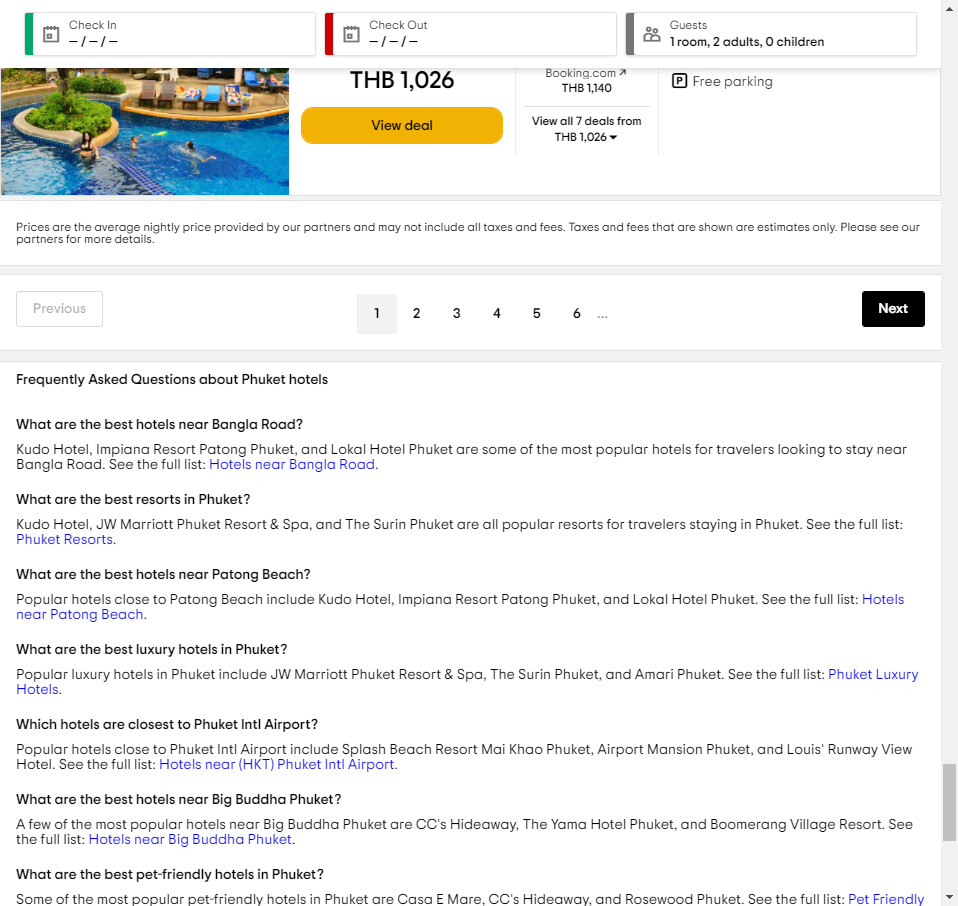

In [119]:
# เลื่อนหน้าจอ มาที่ตำแหน่งทีระบุ
driver.execute_script("window.scrollTo(0," + str(y-250) + ")")
driver.save_screenshot("screenshot.png")
Image('screenshot.png')

In [121]:
# หน้าทั้งหมด
total_page = driver.find_element(By.XPATH,'//*[@data-trackingstring="pagination_h"]').get_attribute('data-numpages')
total_page

'145'

In [128]:
bt_next = driver.find_elements(By.XPATH,'//*[@class="nav next ui_button primary"]')
if len(bt_next) > 0:
  next_page = bt_next[0].get_attribute('data-page-number')
  print(next_page)

3


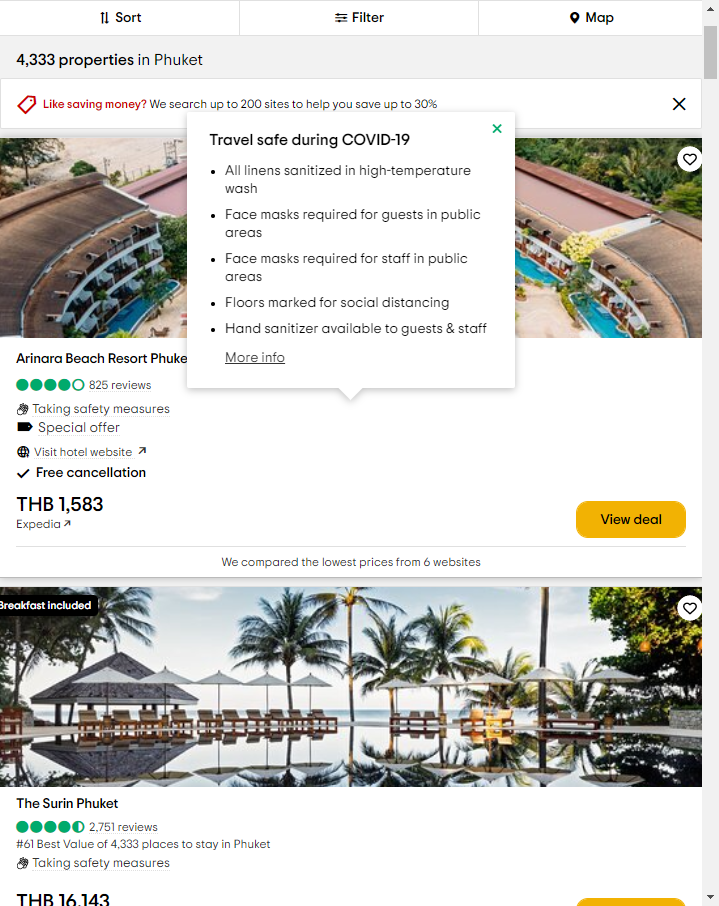

In [129]:
bt_next[0].click()
time.sleep(10)
driver.save_screenshot("screenshot.png")
Image('screenshot.png')

In [131]:
# เช็คการโหลดข้อมูล
loading_element = driver.find_element(By.CLASS_NAME,"loadingBox").is_displayed()
loading_element

False

In [132]:
driver.find_element(By.ID,'taplc_main_pagination_bar_hotels_less_links_v2_0')
  # .screenshot("screenshot.png")
  # Image('screenshot.png')

<selenium.webdriver.remote.webelement.WebElement (session="c0dcb75c735889de4c3d315270938aa4", element="086a983b-682f-48b1-8977-721bfa483d13")>

In [133]:
hotel_list = []

In [134]:
for i in range(10):
# for i in range(int(total_page)):
  try : 
    hotel_list = hotel_list + get_hotel_list(driver)
  except Exception as e:
    print("\r",e,end="") 
  y = driver.find_element(By.ID,'taplc_main_pagination_bar_hotels_less_links_v2_0').location['y']
  driver.execute_script("window.scrollTo(0," + str(y-250) + ")")
  # driver.find_element(By.ID,'taplc_main_pagination_bar_hotels_less_links_v2_0').screenshot("screenshot.png")
  # display(Image('screenshot.png'))
  bt_next = driver.find_elements(By.XPATH,'//*[@class="nav next ui_button primary"]')
  if len(bt_next) > 0:
    try:
      next_page = driver.find_element(By.XPATH,'//*[@class="nav next ui_button primary"]')
      print("\r",next_page.get_attribute('data-page-number'),end="")
      next_page.click()
    except Exception as error:
      # print(error)
      pass
  else:
    break
  count = 0
  while count < 2000:
    loading_element = driver.find_element(By.CLASS_NAME,"loadingBox").is_displayed()
    if not loading_element:
      break
hotel_list = hotel_list + get_hotel_list(driver)

 11

In [135]:
len(hotel_list)

482

In [136]:
pd.DataFrame(hotel_list).drop_duplicates().reset_index(drop=True)

,hotel_name,hotel_id,hotel_href,review_rating,review_count,Choice2021Winner
0,Amari Phuket,property_305178,https://www.tripadvisor.com/Hotel_Review-g2979...,4.5 of 5 bubbles,"9,390 reviews",NaN
1,JW Marriott Phuket Resort & Spa,property_519702,https://www.tripadvisor.com/Hotel_Review-g1223...,4.5 of 5 bubbles,"6,061 reviews",NaN
2,Grand Mercure Phuket Patong,property_6390760,https://www.tripadvisor.com/Hotel_Review-g2979...,4.5 of 5 bubbles,"2,706 reviews",NaN
3,Hotel Clover Patong Phuket,property_13140255,https://www.tripadvisor.com/Hotel_Review-g2979...,4.5 of 5 bubbles,374 reviews,NaN
4,Katathani Phuket Beach Resort,property_540134,https://www.tripadvisor.com/Hotel_Review-g7847...,4.5 of 5 bubbles,"5,401 reviews",NaN
...,...,...,...,...,...,...
337,Meroom,property_7092766,https://www.tripadvisor.com/Hotel_Review-g2315...,4.5 of 5 bubbles,148 reviews,NaN
338,Himmapana Villas,property_15348824,https://www.tripadvisor.com/Hotel_Review-g1379...,5 of 5 bubbles,37 reviews,NaN
339,Two Chefs Inn,property_2572095,https://www.tripadvisor.com/Hotel_Review-g1210...,4.5 of 5 bubbles,97 reviews,NaN
340,Baba House Phuket Hotel,property_9759087,https://www.tripadvisor.com/Hotel_Review-g2315...,4.5 of 5 bubbles,62 reviews,NaN


In [137]:
temp =  pd.DataFrame(hotel_list).drop_duplicates().reset_index(drop=True)
temp['rating'] = temp['review_rating'].apply(lambda x : float( x.split(' ')[0]))
temp['review_count_value'] = temp['review_count'].apply(lambda x : 0 if x != x else int(x.replace(' reviews','').replace(',','')))
temp.describe()

,rating,review_count_value
count,342.000000,342.000000
mean,4.317251,973.707602
std,0.376464,1219.172775
min,3.500000,7.000000
25%,4.000000,155.750000
50%,4.500000,501.500000
75%,4.500000,1335.000000
max,5.000000,9390.000000


In [138]:
temp.groupby(by=['rating'])[['hotel_name']].count()

,hotel_name
rating,
3.5,24
4.0,110
4.5,175
5.0,33


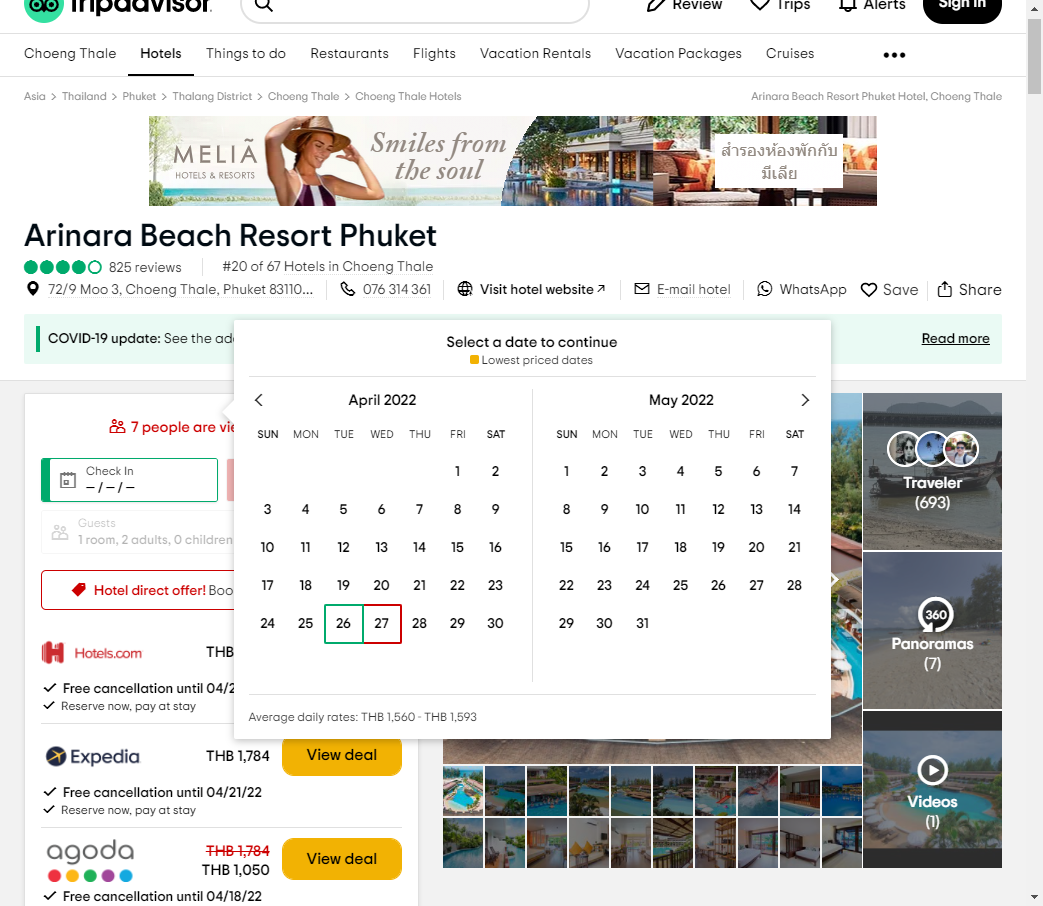

In [141]:
url ='https://www.tripadvisor.com/Hotel_Review-g1224250-d3879035-Reviews-Arinara_Beach_Resort_Phuket-Choeng_Thale_Thalang_District_Phuket.html'
driver.get(url)
time.sleep(10)
driver.save_screenshot("screenshot.png")
Image('screenshot.png')

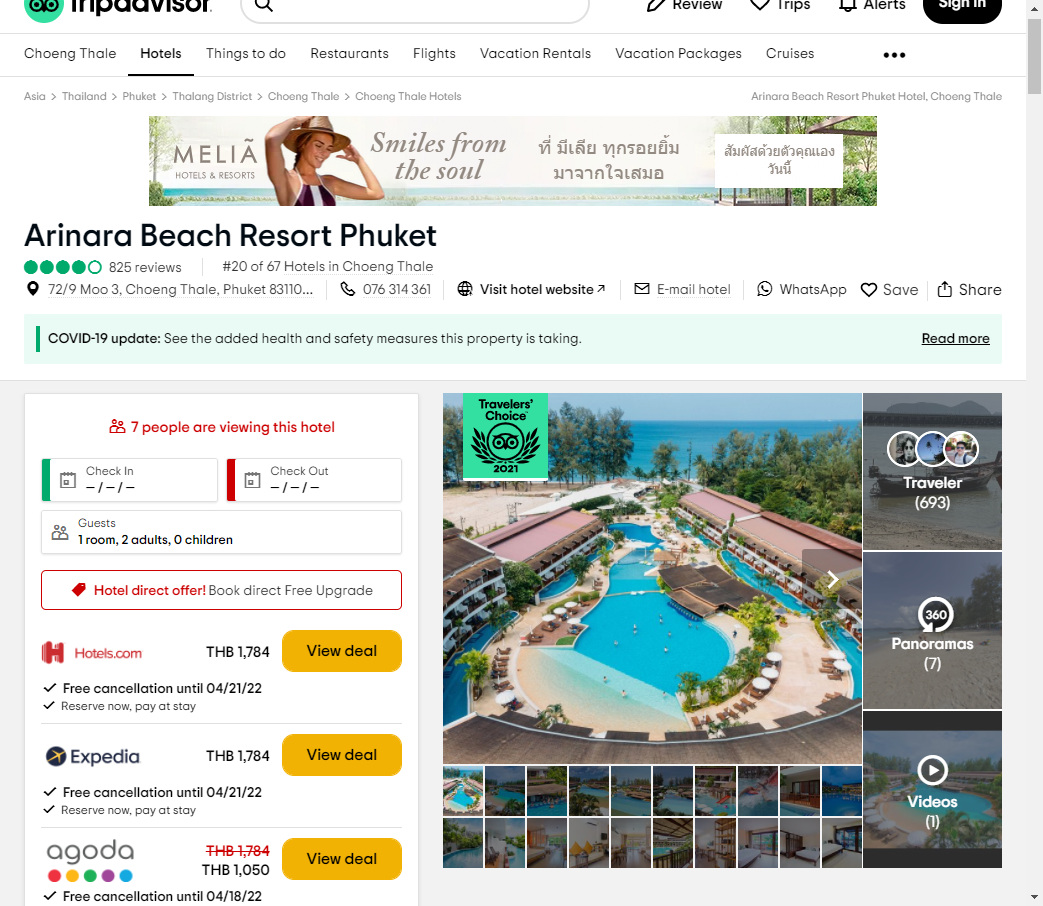

In [142]:
driver.switch_to.active_element.send_keys(Keys.ESCAPE)
driver.save_screenshot("screenshot.png")
Image('screenshot.png')

In [151]:
hotel_info ={}

In [152]:
name_temp = driver.find_elements(By.XPATH,'//*[@id="HEADING"]')
if len(name_temp) > 0:
  hotel_info['name'] = name_temp[0].text
hotel_info

{'name': 'Arinara Beach Resort Phuket'}

In [153]:
rating_temp = driver.find_elements(By.CLASS_NAME,'ui_bubble_rating')
len(rating_temp)

17

In [154]:
[item.text for item in rating_temp]

['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

In [155]:
rating_temp = driver.find_elements(By.XPATH,'//*[@href="#REVIEWS"]')
len(rating_temp)

2

In [156]:
[item.text for item in rating_temp]

['825 reviews', 'Very good\n825 reviews']

In [157]:
rating_temp = driver.find_elements(By.XPATH,'//*[@href="#REVIEWS"]')
if len(rating_temp) > 0:
  hotel_info['rating'] = rating_temp[0].find_element(By.CLASS_NAME,'ui_bubble_rating').get_attribute('class').replace('ui_bubble_rating bubble_','')
  hotel_info['review_count'] = rating_temp[0].find_element(By.CLASS_NAME,'HFUqL').text.replace(' reviews','')
hotel_info

{'name': 'Arinara Beach Resort Phuket', 'rating': '40', 'review_count': '825'}

In [158]:
highlight_temp = driver.find_elements(By.CLASS_NAME,'KeVaw')
if len(highlight_temp) > 0:
  hotel_info['review_count'] = highlight_temp[0].text
hotel_info

{'name': 'Arinara Beach Resort Phuket',
 'rating': '40',
 'review_count': '#20 of 67 Hotels in Choeng Thale'}

In [159]:
location_temp = driver.find_elements(By.XPATH,'//*[@class="epMGr cLZgU"]')
if len(location_temp)>0 :
  hotel_info['address'] =location_temp[0].text
hotel_info  

{'name': 'Arinara Beach Resort Phuket',
 'rating': '40',
 'review_count': '#20 of 67 Hotels in Choeng Thale',
 'address': '72/9 Moo 3, Choeng Thale, Phuket 83110 Thailand'}

In [160]:
phone_temp = driver.find_elements(By.XPATH,'//*[@data-blcontact="PHONE "]')
if len(phone_temp)>0:
  hotel_info['phone'] =phone_temp[0].find_element(By.XPATH,'.//*[@class="eeFQx ceIOZ yYjkv"]').text[4:]
hotel_info  

{'name': 'Arinara Beach Resort Phuket',
 'rating': '40',
 'review_count': '#20 of 67 Hotels in Choeng Thale',
 'address': '72/9 Moo 3, Choeng Thale, Phuket 83110 Thailand',
 'phone': '314 361'}

In [161]:
award_badge_temp = driver.find_elements(By.XPATH,'//*[@data-test-target="tc-award-badge"]')
if len(award_badge_temp)>0:
  hotel_info['award_badge'] = [item.get_attribute('alt') for item in award_badge_temp[0].find_elements(By.XPATH,'.//*')]
hotel_info

{'name': 'Arinara Beach Resort Phuket',
 'rating': '40',
 'review_count': '#20 of 67 Hotels in Choeng Thale',
 'address': '72/9 Moo 3, Choeng Thale, Phuket 83110 Thailand',
 'phone': '314 361',
 'award_badge': ["Travelers' Choice 2021 Winner"]}

In [162]:
[item.get_attribute('data-ssrev-handlers') for item in driver.find_elements(By.CLASS_NAME,'ssr-init-26f')]

['{"load":[3,"TJ00-e","Awards",{"locationId":3879035,"loading":false,"viewport":"DESKTOP","coeAward":3879035,"greenLeader":null,"travelersChoice":null,"isOptimusProperty":false}]}',
 '{"load":[3,"TJ00-e","Description",{"loading":false,"locationDescription":"Let Yourself Be Enchanted Arinara Beach Resort Phuket creates the time and space for you to retreat and relaxing with the care of our attentive hospitality. Our resort designed in harmony environment seamlessly blends seaside architecture with the privacy comforts accommodations, Arinara offers an oasis swimming pool and just steps to the sands of the resort’s beachfront. Whether seeking the perfect retreat or a memorable family holiday, surrender to the enchantment of Arinara Beach Resort Phuket.","viewport":"DESKTOP"}]}',
 '{"load":[3,"R5ISL7","default",{"amenities":{"highlightedAmenities":{"roomFeatures":[{"tagId":18898,"amenityNameLocalized":"Bathrobes","amenityCategoryName":"Comfort","amenityIcon":"hotels"},{"tagId":9658,"ameni

In [163]:
data_ssrev_handlers_temp = driver.find_elements(By.CLASS_NAME,'ssr-init-26f')
if len(data_ssrev_handlers_temp)>0:
  hotel_info['ssrev_handlers'] =[{"type":json.loads(item.get_attribute('data-ssrev-handlers'))['load'][2],
    "value":json.loads(item.get_attribute('data-ssrev-handlers'))['load'][3]} for item in driver.find_elements(By.CLASS_NAME,'ssr-init-26f')]
hotel_info

{'name': 'Arinara Beach Resort Phuket',
 'rating': '40',
 'review_count': '#20 of 67 Hotels in Choeng Thale',
 'address': '72/9 Moo 3, Choeng Thale, Phuket 83110 Thailand',
 'phone': '314 361',
 'award_badge': ["Travelers' Choice 2021 Winner"],
 'ssrev_handlers': [{'type': 'Awards',
   'value': {'locationId': 3879035,
    'loading': False,
    'viewport': 'DESKTOP',
    'coeAward': 3879035,
    'greenLeader': None,
    'travelersChoice': None,
    'isOptimusProperty': False}},
  {'type': 'Description',
   'value': {'loading': False,
    'locationDescription': 'Let Yourself Be Enchanted Arinara Beach Resort Phuket creates the time and space for you to retreat and relaxing with the care of our attentive hospitality. Our resort designed in harmony environment seamlessly blends seaside architecture with the privacy comforts accommodations, Arinara offers an oasis swimming pool and just steps to the sands of the resort’s beachfront. Whether seeking the perfect retreat or a memorable family 

In [164]:
map_temp = driver.find_elements(By.XPATH,'//*[@data-test-target="staticMapSnapshot"]')
if len(map_temp)>0:
  hotel_info['location'] = map_temp[0].find_element(By.XPATH,'.//img').get_attribute('src').split("center=")[1].split("&")[0]
hotel_info

{'name': 'Arinara Beach Resort Phuket',
 'rating': '40',
 'review_count': '#20 of 67 Hotels in Choeng Thale',
 'address': '72/9 Moo 3, Choeng Thale, Phuket 83110 Thailand',
 'phone': '314 361',
 'award_badge': ["Travelers' Choice 2021 Winner"],
 'ssrev_handlers': [{'type': 'Awards',
   'value': {'locationId': 3879035,
    'loading': False,
    'viewport': 'DESKTOP',
    'coeAward': 3879035,
    'greenLeader': None,
    'travelersChoice': None,
    'isOptimusProperty': False}},
  {'type': 'Description',
   'value': {'loading': False,
    'locationDescription': 'Let Yourself Be Enchanted Arinara Beach Resort Phuket creates the time and space for you to retreat and relaxing with the care of our attentive hospitality. Our resort designed in harmony environment seamlessly blends seaside architecture with the privacy comforts accommodations, Arinara offers an oasis swimming pool and just steps to the sands of the resort’s beachfront. Whether seeking the perfect retreat or a memorable family 

In [165]:
driver.close()